<a href="https://colab.research.google.com/github/Lomikk/diamonds_data_analysis_practice-2025-Yashkov/blob/main/diamonds_preprocessing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Постановка бизнес-задачи и описание предметной области

## 1.1 Описание предметной области
Бриллианты — одни из самых дорогих и ценных драгоценных камней на рынке. Их стоимость формируется не случайно: ключевыми характеристиками при оценке алмаза являются **вес (carat)**, **качество огранки (cut)**, **цвет (color)**, **чистота (clarity)**, а также геометрические параметры (глубина, ширина площадки и пр.). Эти параметры известны как система **«4 С»** и активно применяются в ювелирной отрасли.  

Участники рынка (магазины, ритейлеры, покупатели) заинтересованы в прозрачной и обоснованной системе оценки алмазов, чтобы не переплачивать и не занижать цену.

## 1.2 Контекст бизнеса
Бизнес, связанный с продажей и оценкой алмазов, сталкивается с задачей: **как точно и быстро определить рыночную стоимость камня**, опираясь только на его измеримые характеристики. Это важно как при продаже, так и при закупке, особенно для онлайн-ритейлеров, где физический осмотр невозможен.

## 1.3 Бизнес-задача проекта
Понять, **какие характеристики алмаза сильнее всего влияют на его цену**, выявить закономерности в данных, очистить и подготовить набор для последующего анализа и возможного построения модели оценки стоимости.

## 1.4 Основные проблемы в предметной области
- Непрозрачность ценообразования: одинаковые на вид камни могут стоить по-разному.
- Возможные ошибки или неточности в данных (пропуски, дубли, нули в физических измерениях).
- Высокая чувствительность клиентов к цене: завышение/занижение может привести к потере доверия и прибыли.

## 1.5 Причины проблем
- Человеческий фактор при занесении данных.
- Ограниченные возможности визуального контроля в онлайн-продажах.
- Различные подходы к оценке параметров у разных поставщиков.

## 1.6 Описание набора данных
Датасет **«Diamonds Prices»** был загружен с платформы Kaggle. Он содержит **53 943 записи** о бриллиантах с указанием следующих характеристик:
- `carat` — вес камня в каратах  
- `cut` — качество огранки  
- `color` — цвет (от D до J)  
- `clarity` — чистота (от I1 до IF)  
- `depth`, `table` — геометрические параметры (в процентах)  
- `x`, `y`, `z` — размеры в миллиметрах  
- `price` — цена в долларах США

## 1.7 Структура данных
Типы данных:
- Числовые (`float`, `int`): `carat`, `depth`, `table`, `price`, `x`, `y`, `z`  
- Категориальные (`object`): `cut`, `color`, `clarity`


# Предобработка данных «Diamonds Prices»

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("nancyalaswad90/diamonds-prices")

df = pd.read_csv("/kaggle/input/diamonds-prices/Diamonds Prices2022.csv")

### 1. Начало знакомства с данными

In [ ]:
# Первые строки
display(df.head())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Последние строки
display(df.tail())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,53943,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


In [ ]:
# Случайные строки
display(df.sample(5))

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
26651,26652,2.05,Ideal,G,SI2,59.8,59.0,16446,8.22,8.31,4.94
49518,49519,0.71,Ideal,H,SI2,61.5,56.0,2122,5.71,5.74,3.52
30193,30194,0.42,Good,F,SI1,63.4,56.0,722,4.75,4.78,3.02
14726,14727,0.30,Ideal,G,VS1,62.2,55.0,605,4.28,4.31,2.67
3764,3765,0.90,Very Good,F,SI2,63.1,58.0,3457,6.13,6.11,3.86


In [ ]:
# Информация о датафрейме и типы данных
df.info()
# Количество строк и столбцов датасета
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
(53943, 11)


В датасете отсутствуют пропущенные значения, все строки полностью заполнены.
В нем присутствуют разные типы данных, как числовые, так и категориальные.
Из 10 столбцов полезных только 9 первых, столбец "Unnamed: 0" можно удалить.

### 2. Проблемы в данных

In [ ]:
# Удалим лишний столбоец
df = df.drop(df.columns[0], axis=1)

In [ ]:
# Посчитает, сколько всего ячеек, содержащих в себе число 0
print((df == 0).sum().sum())

35


In [ ]:
# Посчитает сколько всего полностью одинаковых дубликатов
print(df.duplicated().sum())

149


Выводы о структуре данных:

Проблемы, которые удалось выявить при беглом осмотре
*   Лишний столбец Unnamed: 0 (удалён)
*   Категориальные колонки (cut, color, clarity) имеют тип object
*   В ячейках встречаются нули, для данного датасета это невозможно и является аномалией
*   Названия столбцов в разном регистре
*   Дубликаты строк
*   Почти все числовые столбцы хранятся как float64 / int64

### 3. Решение выявленых проблем

In [ ]:
# 1. Приводим имена столбцов к нижнему регистру
df.columns = [col.lower() for col in df.columns]

# 2. Приводим все текстовые (object) столбцы к нижнему регистру
text_cols = df.select_dtypes(include="object").columns
for col in text_cols:df[col] = df[col].str.lower()

In [ ]:
display(df.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,premium,e,si1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,good,e,vs1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,premium,i,vs2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,good,j,si2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Поиск строк, где depth не соответствует формуле

# 1) Вычисляем «истинную» глубину по формуле:
calc_depth = df['z'] / ((df['x'] + df['y']) / 2) * 100

# 2) Задаём допустимую погрешность (в процентах)
tolerance = 0.1

# 3) Создаём булеву маску: True там, где расхождение выше tolerance
mask = np.abs(calc_depth - df['depth']) > tolerance

# 4) Отбираем такие строки и добавляем в них вычисленное значение
mismatches = df.loc[mask].copy()
mismatches['calc_depth'] = calc_depth[mask]

# 5) Смотрим, сколько таких строк и примеры
print("Найдено строк, не соответствующих формуле depth:", mismatches.shape[0])
display(mismatches.head(10))


Найдено строк, не соответствующих формуле depth: 1781


,carat,cut,color,clarity,depth,table,price,x,y,z,calc_depth
0,0.23,ideal,e,si2,61.5,55.0,326,3.95,3.98,2.43,61.286255
96,0.70,good,f,vs1,59.4,62.0,2759,5.71,5.76,3.40,59.285092
97,0.96,fair,f,si2,66.3,62.0,2759,6.27,5.95,4.07,66.612111
151,0.74,ideal,i,si1,61.3,56.0,2769,5.82,5.86,3.57,61.130137
177,0.72,very good,g,vs2,63.7,56.4,2776,5.62,5.69,3.61,63.837312
182,0.72,ideal,g,si1,61.8,56.0,2776,5.72,5.75,3.55,61.900610
183,0.72,ideal,g,si1,60.7,56.0,2776,5.79,5.82,3.53,60.809647
255,1.05,fair,j,si2,65.8,59.0,2789,6.41,6.27,4.18,65.930599
314,0.76,fair,g,vs1,59.0,70.0,2800,5.89,5.80,3.46,59.195894
361,0.81,very good,g,si1,62.5,60.0,2806,5.89,5.94,3.69,62.383770


In [ ]:
# 1. Пересчёт "истинной" глубины
calc_depth = df['z'] / ((df['x'] + df['y']) / 2) * 100

# 2. Маска «сильных» расхождений (> 0,5 %)
rel_err = (calc_depth - df['depth']).abs() / df['depth'] * 100
mask_bad = rel_err > 0.5

# 3. Удаляем строки-артефакты
df_clean = df.loc[~mask_bad].copy().reset_index(drop=True)

# 4. Всем оставшимся строкам пересчитываем depth
df_clean['depth'] = (
    df_clean['z'] / ((df_clean['x'] + df_clean['y']) / 2) * 100
).astype('float32')      # сохраняем в том же формате

print(f"Удалено строк-артефактов: {mask_bad.sum()}")
print(f"Новая форма датафрейма  : {df_clean.shape}")

Удалено строк-артефактов: 254
Новая форма датафрейма  : (53689, 10)


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,premium,e,si1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,good,e,vs1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,premium,i,vs2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,good,j,si2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,premium,h,si2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,ideal,d,si2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,premium,e,si1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,premium,f,si1,59.8,62.0,2756,5.74,5.73,3.43


### 4. Проверьте датафрейм на пропуски

In [ ]:
# Посчитает, сколько всего ячеек, содержащих в себе число 0
print((df == 0).sum().sum())

35


Было принято решение удалить строки с нулевыми значениями в столбцах x, y, z по причине того что у бриллианта не может быть длины, ширины или глубины, равных нулю а доля строк с нулями составляет менее 0,1 %.
Заполнение этих строк средними значениями могло бы исказить данные, поскольку невозможно точно определить, нет ли других ошибок в строках с нулевыми значениями.

In [ ]:
# Удаляем строки с нулями в x, y или z
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
# Проверим там ли они были
print((df == 0).sum().sum())

0


Поскольку функция вернула значение 0, можно с уверенностью сказать, что ячейки, содержащие цифры 0, были найдены только в столбцах `x`, `y`, `z`

### 5. Изменение типа данных

Преобразование типов выполнено для экономии памяти и ускорения операций без потери требуемой точности:

Вещественные столбцы переведены из float64 в float32, а целочисленный price – из int64 в int32, поскольку 32-битная точность полностью покрывает диапазон и разброс значений.

Категориальные поля (cut, color, clarity) переведены из object в category, чтобы вместо длинных строк хранились компактные коды и список уникальных меток, что значительно сокращает объём данных и ускоряет группировки и фильтрацию.

In [ ]:
df = df.astype({
    'carat'  : 'float32',
    'depth'  : 'float32',
    'table'  : 'float32',
    'x'      : 'float32',
    'y'      : 'float32',
    'z'      : 'float32',
    'price'  : 'int32',
    'cut'    : 'category',
    'color'  : 'category',
    'clarity': 'category'
})
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53923 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53923 non-null  float32 
 1   cut      53923 non-null  category
 2   color    53923 non-null  category
 3   clarity  53923 non-null  category
 4   depth    53923 non-null  float32 
 5   table    53923 non-null  float32 
 6   price    53923 non-null  int32   
 7   x        53923 non-null  float32 
 8   y        53923 non-null  float32 
 9   z        53923 non-null  float32 
dtypes: category(3), float32(6), int32(1)
memory usage: 2.0 MB


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.500000,55.0,326,3.95,3.98,2.43
1,0.21,premium,e,si1,59.799999,61.0,326,3.89,3.84,2.31
2,0.23,good,e,vs1,56.900002,65.0,327,4.05,4.07,2.31
3,0.29,premium,i,vs2,62.400002,58.0,334,4.20,4.23,2.63
4,0.31,good,j,si2,63.299999,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,premium,h,si2,61.000000,58.0,2757,6.15,6.12,3.74
53939,0.75,ideal,d,si2,62.200001,55.0,2757,5.83,5.87,3.64
53940,0.71,premium,e,si1,60.500000,55.0,2756,5.79,5.74,3.49
53941,0.71,premium,f,si1,59.799999,62.0,2756,5.74,5.73,3.43


### 5. Поиск/Удаление дубликатов

In [ ]:
# Реальное количество полностью одинаковых дубликатов
print(df.duplicated().sum())

148


   Данные могли сливаться из нескольких файлов или выгружаться разными способами, и одна и та же запись попала в итоговый датасет дважды.

In [ ]:
# Удалим дубликаты и сбросим нумерацию
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53775 entries, 0 to 53774
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53775 non-null  float32 
 1   cut      53775 non-null  category
 2   color    53775 non-null  category
 3   clarity  53775 non-null  category
 4   depth    53775 non-null  float32 
 5   table    53775 non-null  float32 
 6   price    53775 non-null  int32   
 7   x        53775 non-null  float32 
 8   y        53775 non-null  float32 
 9   z        53775 non-null  float32 
dtypes: category(3), float32(6), int32(1)
memory usage: 1.6 MB


### Промежуточные выводы

1. **Объём и структура данных**  
   — Изначально загружен датасет «Diamonds Prices» с Kaggle: 53 943 записи и 11 столбцов
   — После удаления служебного столбца `Unnamed: 0`, строк с некорректными размерами (`x, y, z = 0`) и 148 полных дубликатов осталось 53 775 строк и 10 столбцов.

2. **Качество данных и обработка ошибок**  
   — Выявлены «скрытые» пропуски в физически невозможных значениях размеров камней (нулей < 0,1 % строк) — строки удалены
   — Явных `NaN` не было.

3. **Приведение к единому стилю**  
   — Все имена столбцов и текстовые значения приведены к нижнему регистру (snake_case).

4. **Оптимизация типов данных**  
   — Числовые поля (`carat`, `depth`, `table`, `x`, `y`, `z`) переведены в `float32`, цена (`price`) — в `int32`
   — Категориальные признаки (`cut`, `color`, `clarity`) переведены из `object` в `category` для экономии памяти и ускорения группировок.

5. **Экономия ресурсов**  
   — Память уменьшена с ≈ 4.5 МБ до ≈ 1.6 МБ благодаря удалению лишних строк и смене типов, индекс сброшен до компактного `RangeIndex`


#**-------Исследовательский анализ данных**

In [ ]:
df[:10] # Первые 10 строк

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.500000,55.0,326,3.95,3.98,2.43
1,0.21,premium,e,si1,59.799999,61.0,326,3.89,3.84,2.31
2,0.23,good,e,vs1,56.900002,65.0,327,4.05,4.07,2.31
3,0.29,premium,i,vs2,62.400002,58.0,334,4.20,4.23,2.63
4,0.31,good,j,si2,63.299999,58.0,335,4.34,4.35,2.75
5,0.24,very good,j,vvs2,62.799999,57.0,336,3.94,3.96,2.48
6,0.24,very good,i,vvs1,62.299999,57.0,336,3.95,3.98,2.47
7,0.26,very good,h,si1,61.900002,55.0,337,4.07,4.11,2.53
8,0.22,fair,e,vs2,65.099998,61.0,337,3.87,3.78,2.49
9,0.23,very good,h,vs1,59.400002,61.0,338,4.00,4.05,2.39


In [ ]:
df[-10:] # Последние 10 строк

,carat,cut,color,clarity,depth,table,price,x,y,z
53765,0.71,premium,e,si1,60.500000,55.0,2756,5.79,5.74,3.49
53766,0.71,premium,f,si1,59.799999,62.0,2756,5.74,5.73,3.43
53767,0.70,very good,e,vs2,60.500000,59.0,2757,5.71,5.76,3.47
53768,0.70,very good,e,vs2,61.200001,59.0,2757,5.69,5.72,3.49
53769,0.72,premium,d,si1,62.700001,59.0,2757,5.69,5.73,3.58
53770,0.72,ideal,d,si1,60.799999,57.0,2757,5.75,5.76,3.50
53771,0.72,good,d,si1,63.099998,55.0,2757,5.69,5.75,3.61
53772,0.70,very good,d,si1,62.799999,60.0,2757,5.66,5.68,3.56
53773,0.86,premium,h,si2,61.000000,58.0,2757,6.15,6.12,3.74
53774,0.75,ideal,d,si2,62.200001,55.0,2757,5.83,5.87,3.64


In [ ]:
df.iloc[::5000, [0, 6]] # Каждая 5-тысячная строка carat и price

,carat,price
0,0.23,326
5000,0.90,3746
10000,0.23,414
15000,0.30,605
20000,0.31,625
25000,1.06,13588
30000,0.32,720
35000,0.30,886
40000,0.51,1116
45000,0.50,1654


In [ ]:
df[10000:10011][['cut','color','clarity']] # 10000-10010 строки cut	color	clarity

,cut,color,clarity
10000,very good,g,vvs1
10001,very good,g,vvs1
10002,good,f,vs1
10003,ideal,f,si2
10004,fair,j,vs2
10005,good,h,si2
10006,ideal,i,vs1
10007,ideal,h,si1
10008,very good,f,vs1
10009,premium,e,vs2


In [ ]:
df.loc[0] # Одна строка

,0
carat,0.23
cut,ideal
color,e
clarity,si2
depth,61.5
table,55.0
price,326
x,3.95
y,3.98
z,2.43


#Логическая индексация

In [ ]:
# Крупные камни: масса больше 2 карат
df[df['carat'] > 2.0][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
12211,2.06,premium,j,i1,61.200001,58.0,5203,8.10,8.07,4.95
12964,2.14,fair,j,i1,69.400002,57.0,5405,7.74,7.70,5.36
13080,2.15,fair,j,i1,65.500000,57.0,5430,8.01,7.95,5.23


In [ ]:
# Эталонный
df[(df['cut']     == 'ideal') &
   (df['color']   =='d') &
   (df['carat']   == 1) &
   (df['clarity'] == 'if')]


,carat,cut,color,clarity,depth,table,price,x,y,z
26584,1.0,ideal,d,if,60.700001,57.0,16469,6.44,6.48,3.92


In [ ]:
# Сверхдорогие экземпляры цена за карат > 15000 $
df[(df['price'] / df['carat']) > 15000][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
25927,1.01,very good,d,if,63.400002,59.0,15219,6.39,6.26,4.01
26006,1.02,very good,d,if,62.700001,57.0,15306,6.36,6.46,4.02
26034,1.02,premium,d,if,61.500000,60.0,15370,6.52,6.45,3.99


In [ ]:
# Правильные пропорции: depth 60-62 %, table 55-59 %
df[df['depth'].between(60, 62) &
   df['table'].between(55, 59)][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.500000,55.0,326,3.95,3.98,2.43
7,0.26,very good,h,si1,61.900002,55.0,337,4.07,4.11,2.53
15,0.32,premium,e,i1,60.900002,58.0,345,4.38,4.42,2.68


In [ ]:
# Камни высшей чистоты (IF, VVS1) и топ-огранки (Premium / Ideal)
df[df['clarity'].isin(['if', 'vvs1']) &
   df['cut'].isin(['premium', 'ideal'])][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
66,0.32,ideal,i,vvs1,62.000000,55.299999,553,4.39,4.42,2.73
69,0.24,premium,e,vvs1,60.700001,58.000000,553,4.01,4.03,2.44
85,0.24,premium,g,vvs1,62.299999,59.000000,554,3.95,3.92,2.45


#Сортировка

In [ ]:
head = 3
# 1) Самые большие караты
top_carat = df.sort_values('carat', ascending=False).head(head)
low_carat = df.sort_values('carat', ascending=True).head(head)

# 2) Самая высокая и самая низкая цена
top_price = df.sort_values('price', ascending=False).head(head)
low_price = df.sort_values('price').head(head)

# 3) Лучшая пропорция depth (ближе к 61 %) и максимумы
best_depth = df.reindex(df['depth'].sub(61).abs().sort_values().index).head(head)
shallow    = df.sort_values('depth').head(head)       # минимальная глубина
deep       = df.sort_values('depth', ascending=False).head(head)  # максимальная

# 4) Идеальный table (54-56 %) и максимумы
best_table = df.query("table.between(54, 56)").sort_values('table').head(head)
flat_table = df.sort_values('table').head(head)       # слишком узкая площадка
wide_table = df.sort_values('table', ascending=False).head(head)


In [ ]:
top_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
27336,5.01,fair,j,i1,65.500000,59.0,18018,10.74,10.54,6.98
27547,4.50,fair,j,i1,65.800003,58.0,18531,10.23,10.16,6.72
27051,4.13,fair,h,i1,64.800003,61.0,17329,10.00,9.85,6.43


In [ ]:
low_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
14,0.2,premium,e,si2,60.200001,62.0,345,3.79,3.75,2.27
31496,0.2,ideal,e,vs2,62.200001,57.0,367,3.76,3.73,2.33
31495,0.2,very good,e,vs2,63.400002,59.0,367,3.74,3.71,2.36


In [ ]:
top_price

,carat,cut,color,clarity,depth,table,price,x,y,z
27665,2.29,premium,i,vs2,60.799999,60.0,18823,8.50,8.47,5.16
27664,2.00,very good,g,si1,63.500000,56.0,18818,7.90,7.97,5.04
27663,1.51,ideal,g,if,61.700001,55.0,18806,7.37,7.41,4.56


In [ ]:
low_price

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.500000,55.0,326,3.95,3.98,2.43
1,0.21,premium,e,si1,59.799999,61.0,326,3.89,3.84,2.31
2,0.23,good,e,vs1,56.900002,65.0,327,4.05,4.07,2.31


In [ ]:
best_depth

,carat,cut,color,clarity,depth,table,price,x,y,z
8339,1.01,very good,e,si1,61.0,56.0,4399,6.47,6.54,3.97
8396,1.21,premium,i,si1,61.0,56.0,4404,6.91,6.87,4.20
53773,0.86,premium,h,si2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
shallow

,carat,cut,color,clarity,depth,table,price,x,y,z
10348,1.09,ideal,j,vs2,43.0,54.0,4778,6.53,6.55,4.12
4504,1.00,fair,g,si1,43.0,59.0,3634,6.32,6.27,3.97
6321,1.00,fair,g,vs2,44.0,53.0,4032,6.31,6.24,4.12


In [ ]:
deep

,carat,cut,color,clarity,depth,table,price,x,y,z
52696,0.50,fair,e,vs2,79.000000,73.0,2579,5.21,5.18,4.09
41770,1.03,fair,e,i1,78.199997,54.0,1262,5.72,5.59,4.42
46523,0.99,fair,j,i1,73.599998,60.0,1789,6.01,5.80,4.35


In [ ]:
best_table

,carat,cut,color,clarity,depth,table,price,x,y,z
17311,1.55,ideal,j,si2,62.299999,54.0,6966,7.38,7.42,4.61
47447,0.51,ideal,h,if,62.000000,54.0,1879,5.14,5.18,3.20
17355,1.71,good,f,si2,63.700001,54.0,6971,7.60,7.49,4.81


In [ ]:
flat_table

,carat,cut,color,clarity,depth,table,price,x,y,z
11334,1.04,ideal,i,vs1,62.900002,43.0,4997,6.45,6.41,4.04
35514,0.29,very good,e,vs1,62.799999,44.0,474,4.20,4.24,2.65
22642,0.30,fair,e,si1,64.500000,49.0,630,4.28,4.25,2.75


In [ ]:
wide_table

,carat,cut,color,clarity,depth,table,price,x,y,z
24864,2.01,fair,f,si1,58.599998,95.0,13387,8.32,8.31,4.87
50610,0.81,fair,f,si2,68.800003,79.0,2301,5.26,5.20,3.58
51179,0.79,fair,g,si1,65.300003,76.0,2362,5.52,5.13,3.35


### Выводы по результатам анализа экстремальных значений признаков бриллиантов:

---

### 1. Анализ по **массе (carat)**

**Самые тяжёлые бриллианты (TOP Carat):**

* Имеют массу от **4 до 5 карат** и огранку преимущественно уровня **Fair/Premium**.
* Характеризуются средним качеством цвета (**I–J**) и минимальной чистотой (**I1**).
* Цены таких камней ≈ **\$15 000–18 500**.

**Самые лёгкие бриллианты (LOW Carat):**

* Имеют массу около **0,2 карата**.
* Качество огранки в основном высокое (**Premium, Ideal, Very Good**), цвет **E/D** (лучшие категории), и достаточно высокое качество чистоты (**SI2–VS2**).
* Цена колеблется около **\$345–367**.

**Бизнес-вывод:**
Самые крупные бриллианты не всегда означают высочайшее качество. Часто крупные камни имеют серьёзные компромиссы по чистоте и цвету, но всё равно высоко ценятся из-за редкости. Маленькие бриллианты могут быть намного чище и качественнее, но имеют меньшую абсолютную цену.

---

### 2. Анализ по **цене (Price)**

**Самые дорогие бриллианты (TOP Price):**

* Цены достигают ≈ **\$18 800** при весе от 1,5 до 2,3 карата.
* Эти камни обычно имеют **высокое качество огранки (Premium, Ideal, Very Good)**, хороший цвет (G–I), и относительно высокую чистоту (IF–SI2).
* Имеют оптимальные пропорции `depth` и `table`.

**Самые дешёвые бриллианты (LOW Price):**

* Цена в пределах **\$326–335**, масса до 0,31 карата.
* Чаще всего имеют средние характеристики огранки (**Ideal, Premium, Good**), но высокое качество цвета (**E–J**) и приемлемую чистоту (**SI2–VS1**).

**Бизнес-вывод:**
Самые дорогие бриллианты необязательно самые крупные. Высокая цена связана с балансом качеств — оптимальная масса (≈ 2 карата), высококлассная огранка и высокое качество чистоты/цвета. Дешёвые камни обладают меньшей массой, но характеристики часто достойные, что позволяет использовать их в массовом производстве ювелирных украшений.

---

### 3. Анализ по **глубине (Depth)**

**Идеальная глубина (Best Depth \~61%):**

* Встречается у бриллиантов разных размеров (0,3–1,2 карата) с отличными характеристиками огранки (**Ideal, Premium, Very Good**).
* Хороший баланс качества и цены: \$750–4 400.

**Минимальная глубина (Min Depth ≈ 43–51%):**

* Связана с бриллиантами огранки **Fair**.
* Несмотря на сравнительно большой вес (1–1,4 карата), имеют среднее качество цвета и чистоты и низкие цены, что обусловлено плохой огранкой.

**Максимальная глубина (Max Depth ≈ 72–79%):**

* Также преимущественно плохая огранка (**Fair**) и относительно низкая цена при нормальной массе (до 1 карата).
* Это камни с крайне неудачными пропорциями, сильно теряющими в рыночной цене.

**Бизнес-вывод:**
Оптимальные значения глубины (≈61%) обеспечивают максимальную ценность бриллианта. Камни с экстремально большой или маленькой глубиной (менее 55% или более 70%) теряют привлекательность и должны реализовываться по сниженным ценам.

---

### 4. Анализ по **площади верхнего фасета (Table)**

**Идеальный размер площадки (Ideal Table ≈ 54–56%):**

* Соответствует бриллиантам с **отличной огранкой (Ideal, Very Good)** и хорошим балансом всех характеристик (вес, чистота, цвет).
* Цена при такой площади площадки относительно высока и стабильна.

**Минимальная площадка (Min Table ≈ 43–50%):**

* Огранка различного качества (**Ideal–Fair**), но преобладают не самые удачные варианты.
* Цена заметно ниже аналогов с оптимальными параметрами.

**Максимальная площадка (Max Table ≈ 73–95%):**

* Обычно бриллианты с плохой огранкой (**Fair**) и сильно завышенной площадкой.
* Несмотря на вес от 0,5 до 2 карат, цена существенно ниже аналогов с нормальной площадкой.

**Бизнес-вывод:**
Размер площадки (`table`) — важный показатель. Наибольшую ценность имеют бриллианты с площадкой около 55%. Слишком узкая (< 50%) или широкая (> 70%) площадка ухудшает визуальные характеристики камня, серьёзно снижая его рыночную стоимость.

---

## Итоговые выводы в рамках бизнес-задачи:

1. **Самые дорогие бриллианты** — это баланс между весом (около 2-х карат), огранкой высокого класса (Ideal/Premium), оптимальной глубиной (\~61%) и площадкой (\~55%), а также высоким качеством чистоты и цвета.

2. **Самые дешёвые камни** — несмотря на низкую абсолютную цену, обычно имеют неплохие базовые характеристики, что делает их идеальными для массовых изделий.

3. **Большие по массе камни** могут терять в цене, если имеют слабые характеристики чистоты и огранки.

4. **Оптимальные пропорции (`depth` и `table`)** критичны для максимальной рыночной стоимости бриллианта. Даже крупные и чистые камни с неудачными пропорциями теряют свою инвестиционную привлекательность.

Таким образом, ключевые характеристики (`carat`, `depth`, `table`, `cut`, `clarity`, `color`) должны тщательно анализироваться вместе для принятия правильных решений о закупке и ценообразовании.


In [ ]:
# выбрать все алмазы с каратностью больше 0.3
df.query("carat > 0.3").head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
4,0.31,good,j,si2,63.299999,58.0,335,4.34,4.35,2.75
13,0.31,ideal,j,si2,62.200001,54.0,344,4.35,4.37,2.71
15,0.32,premium,e,i1,60.900002,58.0,345,4.38,4.42,2.68


In [ ]:
# глубина между 60 и 63 включительно
df.query("depth.between(60, 63)").head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.500000,55.0,326,3.95,3.98,2.43
3,0.29,premium,i,vs2,62.400002,58.0,334,4.20,4.23,2.63
5,0.24,very good,j,vvs2,62.799999,57.0,336,3.94,3.96,2.48


In [ ]:
# зададим цену используя переменную
min_price = 500
df.query("price == @min_price").head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
40794,0.25,very good,i,vvs2,62.099998,56.0,500,4.03,4.05,2.51
40795,0.31,ideal,g,vs2,60.799999,56.0,500,4.40,4.42,2.68
40796,0.27,ideal,h,vs1,62.299999,54.0,500,4.16,4.19,2.60


In [ ]:
df.query("cut == 'premium' and price < 2000").head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,premium,e,si1,59.799999,61.0,326,3.89,3.84,2.31
3,0.29,premium,i,vs2,62.400002,58.0,334,4.20,4.23,2.63
12,0.22,premium,f,si1,60.400002,61.0,342,3.88,3.84,2.33


In [ ]:
# найдем камень premium по минимальной цене
premium = df.query("cut == 'premium'")
premium.nsmallest(1, 'price')



,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,premium,e,si1,59.799999,61.0,326,3.89,3.84,2.31


#DataFrame.where()

In [ ]:
# Цена выше 700
rows = np.where(df["price"] > 700)
df.iloc[rows][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.70,ideal,e,si1,62.500000,57.0,2757,5.70,5.72,3.57
91,0.86,fair,e,si2,55.099998,69.0,2757,6.45,6.33,3.52
92,0.70,ideal,g,vs2,61.599998,56.0,2757,5.70,5.67,3.50


In [ ]:
# Цена выше 700
rows = np.where(df["price"] > 700)
df.iloc[rows][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.70,ideal,e,si1,62.500000,57.0,2757,5.70,5.72,3.57
91,0.86,fair,e,si2,55.099998,69.0,2757,6.45,6.33,3.52
92,0.70,ideal,g,vs2,61.599998,56.0,2757,5.70,5.67,3.50


In [ ]:
 # огранка premium
rows = np.where(df["cut"] == "premium")
df.iloc[rows][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,premium,e,si1,59.799999,61.0,326,3.89,3.84,2.31
3,0.29,premium,i,vs2,62.400002,58.0,334,4.20,4.23,2.63
12,0.22,premium,f,si1,60.400002,61.0,342,3.88,3.84,2.33


In [ ]:
# глубина между 61 и 63
rows = np.where((df["depth"] >= 61) & (df["depth"] <= 63))
df.iloc[rows][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.500000,55.0,326,3.95,3.98,2.43
3,0.29,premium,i,vs2,62.400002,58.0,334,4.20,4.23,2.63
5,0.24,very good,j,vvs2,62.799999,57.0,336,3.94,3.96,2.48


In [ ]:
# Цвет D, E или F
rows = np.where(df["color"].isin(["d", "e", "f"]))
df.iloc[rows][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,ideal,e,si2,61.500000,55.0,326,3.95,3.98,2.43
1,0.21,premium,e,si1,59.799999,61.0,326,3.89,3.84,2.31
2,0.23,good,e,vs1,56.900002,65.0,327,4.05,4.07,2.31


In [ ]:
# Каратность <= 0.3 и цена = 400
rows = np.where((df["carat"] <= 0.3) & (df["price"] == 400))
df.iloc[rows][:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
50456,0.23,very good,e,vs2,62.400002,60.0,400,3.90,3.92,2.44
50457,0.23,premium,e,vs1,61.799999,60.0,400,3.91,3.95,2.43


#Сводные таблицы


**Средняя цена по типу огранки**

In [ ]:
df.pivot_table(index='cut', values='price', aggfunc='mean', observed=True)

,price
cut,
fair,4340.677520
good,3916.279051
ideal,3462.148150
premium,4578.913809
very good,3980.920202


**Количество алмазов по цвету и типу огранки**

In [ ]:
df.pivot_table(index='color', columns='cut', values='price', aggfunc='count', observed=True)

cut,fair,good,ideal,premium,very good
color,,,,,
d,163,660,2823,1598,1510
e,222,931,3893,2331,2399
f,309,907,3818,2320,2163
g,311,867,4863,2915,2298
h,299,699,3104,2346,1818
i,174,518,2090,1421,1203
j,119,306,894,806,677


**Медианная каратность по чистоте и цвету**

(какой вес алмаза является типичным для каждой сочетания двух его категорий)

In [ ]:
df.pivot_table(index='clarity', columns='color', values='carat', aggfunc='median', observed=True)

color,d,e,f,g,h,i,j
clarity,,,,,,,
i1,1.12,1.050,1.02,1.03,1.220,1.20,1.505
if,0.59,0.335,0.32,0.35,0.360,0.38,0.410
si1,0.56,0.700,0.73,0.73,1.010,1.04,1.120
si2,0.90,0.910,1.00,1.01,1.110,1.25,1.240
vs1,0.51,0.500,0.57,0.57,0.700,0.78,0.930
vs2,0.50,0.510,0.56,0.72,0.900,1.01,1.090
vvs1,0.40,0.330,0.38,0.40,0.370,0.43,0.700
vvs2,0.40,0.380,0.50,0.52,0.395,0.52,1.015


## Выводы по сводным таблицам

На основе анализа сводных таблиц можно сделать следующие выводы:

*   **Средняя цена по типу огранки (`cut`)**: Бриллианты с огранкой 'premium' имеют самую высокую среднюю цену, за ними следуют 'fair', 'very good', 'good', и 'ideal'. Это может показаться неочевидным, так как "ideal" считается лучшей огранкой. Однако, "ideal" бриллианты могут иметь меньшую каратность, в то время как "premium" и "fair" могут иметь более крупные, но менее идеально ограненные камни, что влияет на среднюю цену.
*   **Количество алмазов по цвету (`color`) и типу огранки (`cut`)**: Распределение бриллиантов по цвету и типу огранки показывает, что 'ideal' огранка наиболее распространена среди всех цветов, особенно для цвета 'g'. Огранка 'premium' также хорошо представлена, в то время как 'fair' огранка встречается реже.
*   **Медианная каратность по чистоте (`clarity`) и цвету (`color`)**: Медианная каратность в целом увеличивается с понижением качества чистоты (от IF к I1) и цвета (от D к J). Это подтверждает предыдущие выводы о том, что более крупные бриллианты часто имеют более низкое качество по чистоте и цвету.

Таким образом, сводные таблицы подтверждают, что цена бриллианта является комплексным показателем, зависящим от сочетания всех характеристик, а не только от одной. Более высокое качество огранки, цвета и чистоты часто ассоциируется с меньшей каратностью, что влияет на абсолютную цену, в то время как крупные камни могут иметь более низкое качество по этим параметрам, но высокую цену из-за своего веса.

In [ ]:
df.groupby('cut', observed=True).agg(
                  price_sum  = ('price', 'sum'),
                  price_mean = ('price', 'mean'),
                  price_min  = ('price', 'min'),
                  price_max  = ('price', 'max'),)

,price_sum,price_mean,price_min,price_max
cut,,,,
fair,6932062,4340.677520,337,18574
good,19142772,3916.279051,327,18707
ideal,74384253,3462.148150,326,18806
premium,62900539,4578.913809,326,18823
very good,48041745,3980.920202,336,18818


Вывод по полученным данным:

На основе агрегированных данных можно сделать несколько ключевых выводов о ценах на алмазы в зависимости от типа их огранки (`cut`):

1. **Самая высокая средняя цена** наблюдается у алмазов с огранкой **Premium** (≈4579). Это говорит о том, что огранка Premium в среднем оценивается рынком выше, чем остальные типы.

2. **Самая низкая средняя цена** отмечается для огранки **Ideal** (≈3462), несмотря на то, что огранка Ideal обычно считается наиболее качественной с технической точки зрения. Это может свидетельствовать о том, что среди Ideal много более мелких алмазов, что снижает среднюю цену.

3. По общей сумме продаж лидирует огранка **Ideal** (≈74.38 млн), что объясняется, скорее всего, большим количеством алмазов этого типа в наборе данных.

4. Минимальные цены на алмазы очень похожи во всех группах (около 326–337), что говорит о том, что независимо от типа огранки, минимальный порог цен почти одинаков.

5. Максимальные цены в разных категориях также почти идентичны (от 18574 до 18823). Это означает, что при наибольших каратностях и характеристиках тип огранки не является ключевым фактором, существенно влияющим на верхний предел цены.

**Итого**:

* Если выбирать огранку по принципу максимальной средней цены (наиболее прибыльной с точки зрения средней сделки), то это **Premium**.
* Если важен объем рынка и массовость продаж, то лидирует **Ideal**.
* Огранки Fair и Good находятся примерно в середине диапазона по всем показателям и могут считаться бюджетными или средними по качеству и цене.


##**исследовательский анализ данных**

(worst) ——> (best)

color: J, I, H, G, F, E, D

cut: Fair, Good, Very Good, Premium, Ideal

clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

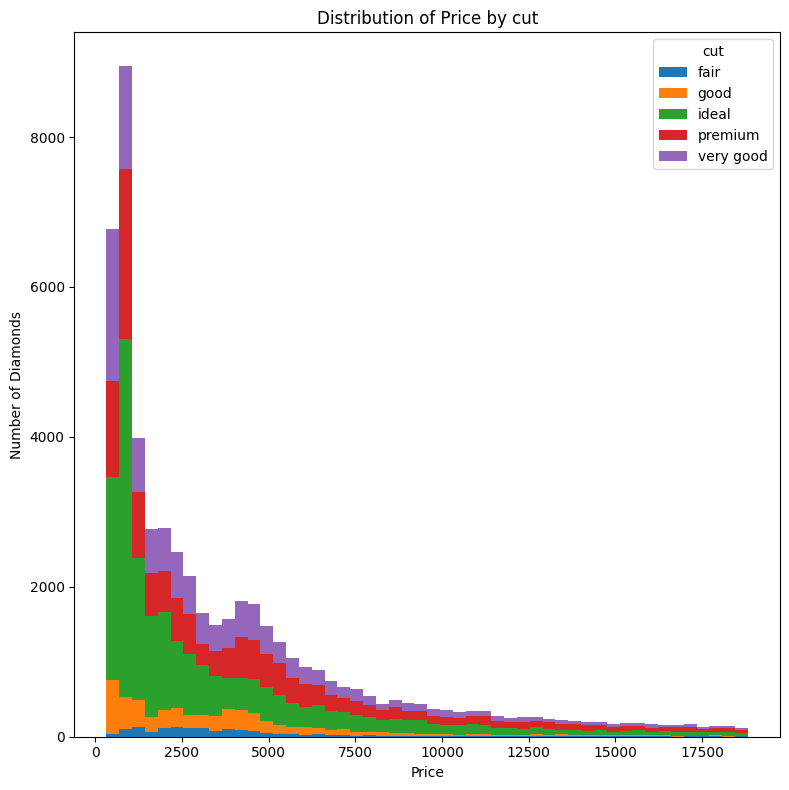

In [ ]:
category = 'cut' # 'cut', 'color' или 'clarity'

df[category] = df[category].astype('category')
categories = df[category].cat.categories

data = [df.loc[df[category] == cat, 'price'] for cat in categories]

plt.figure(figsize=(8, 8))
plt.hist(data, bins=50, stacked=True, label=categories)
plt.xlabel('Price')
plt.ylabel('Number of Diamonds')
plt.title(f'Distribution of Price by {category}')
plt.legend(title=category)
plt.tight_layout()
plt.show()


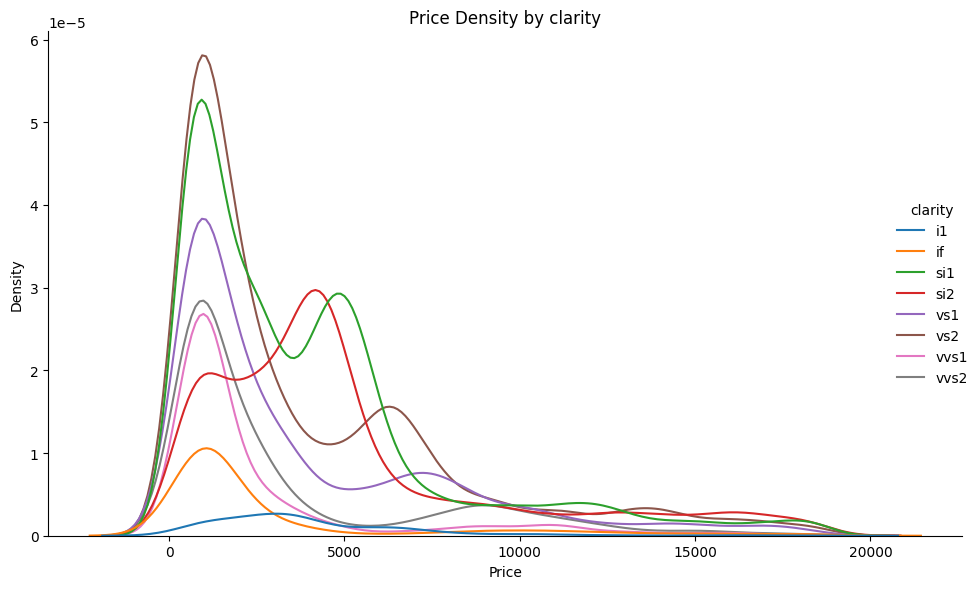

In [ ]:
category = 'clarity' # 'cut', 'color' или 'clarity'

sns.displot(df, x='price', hue=category, kind='kde', height=6, aspect=1.5)
plt.title(f'Price Density by {category}')
plt.xlabel('Price')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

Корреляционная матрица с тепловой картой

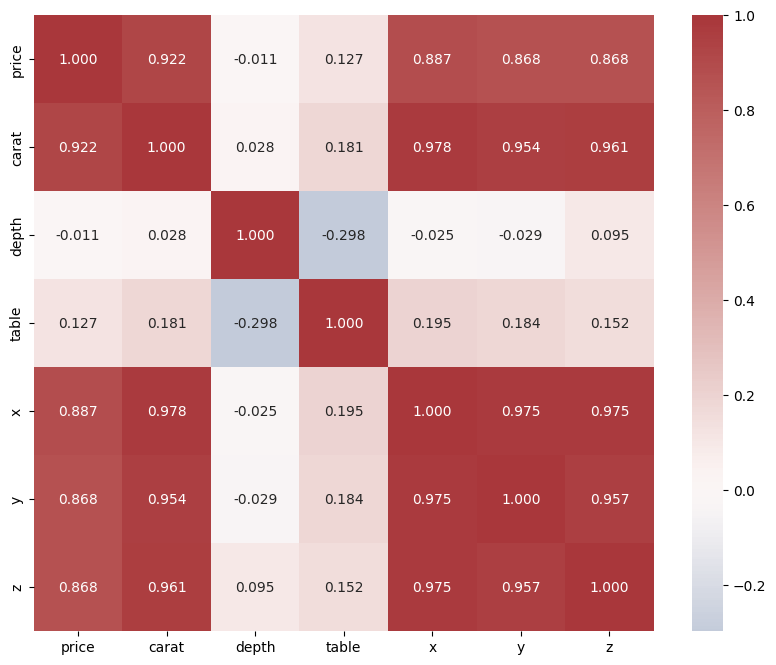

In [ ]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categoric_vars = ['cut', 'color', 'clarity']
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag', center = 0,)
plt.show()

Исходя из корреляции, показанной на диаграмме, можно принять решение объединить параметры x, y, z в один и назвать его volume.

In [ ]:
df['volume'] = df['x'] * df['y'] * df['z']
df = df.drop(columns=['x', 'y', 'z'])

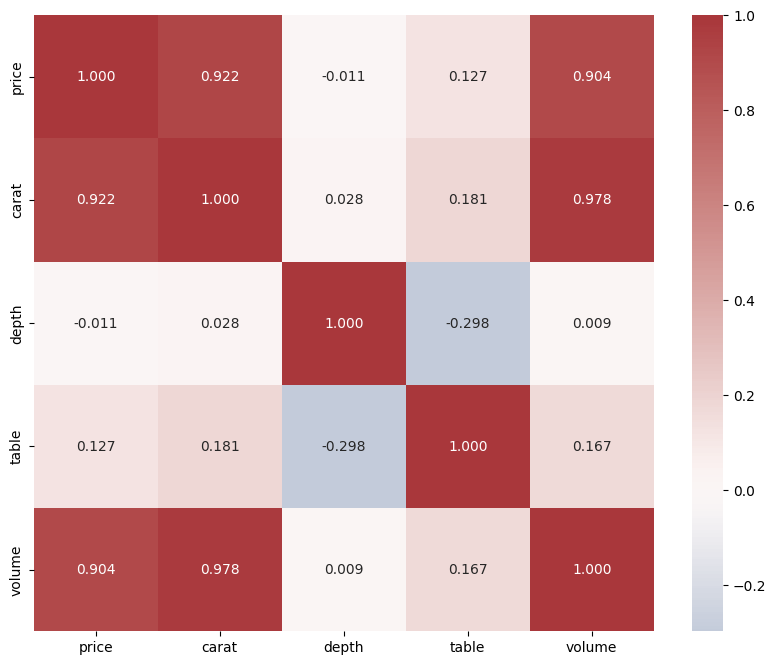

In [ ]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'volume']
categoric_vars = ['cut', 'color', 'clarity']
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag', center = 0,)
plt.show()

### Основные наблюдения:

1. **Сильная положительная корреляция:**

   * **carat и volume**: **0.978** - вес и объём алмаза тесно связаны.
   * **carat и price**: **0.922** - чем больше вес, тем выше цена.
   * **price и volume**: **0.904** - объём сильно влияет на цену.

2. **Слабая/умеренная положительная корреляция:**

   * **carat и table**: **0.181**
   * **table и price**: **0.127**
   * **table и volume**: **0.167**

3. **Практически отсутствующая корреляция:**

   * **depth и price**: **-0.011**
   * **depth и volume**: **0.009**
   * **depth и carat**: **0.028**

4. **Отрицательная корреляция:**

   * **depth и table**: **-0.298** - увеличение глубины связано с уменьшением площадки.

## Итоговый вывод по исследовательскому анализу бриллиантов:

1. **Дорогие бриллианты**:

   * Вес около **2 карат**, высококлассная огранка (**Premium/Ideal**), оптимальные пропорции (**глубина \~61%, площадка \~55%**), высокая чистота и цвет.
   * Максимальная масса (4–5 карат) не всегда гарантирует качество, но цены остаются высокими из-за редкости.

2. **Недорогие бриллианты**:

   * Маленькая масса (≈0,2–0,3 карата), хорошее качество огранки и цвета, низкая абсолютная цена, подходящие для массового рынка.

3. **Пропорции (`depth`, `table`)**:

   * Оптимальны: глубина около **61%**, площадка около **55%**.
   * Любые отклонения сильно снижают цену.

4. **Тип огранки (`cut`)**:

   * Максимальная средняя цена у огранки **Premium**, массовость и объём продаж у **Ideal**.
   * Огранка почти не влияет на минимальные и максимальные цены.

5. **Корреляции**:

   * Очень высокая зависимость цены от массы и объёма.
   * Глубина почти не влияет на цену.

#**Графический анализ данных**

matplotlib

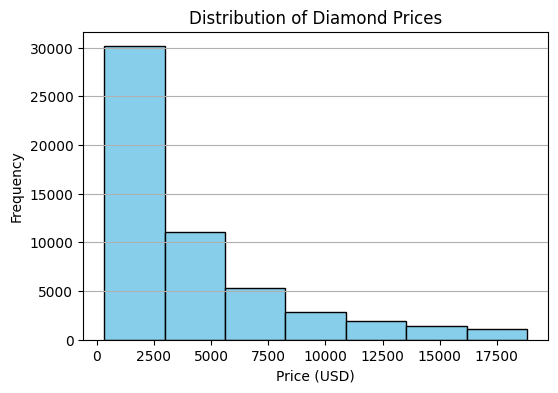

In [ ]:
#из датасета
plt.figure(figsize=(6,4))
plt.hist(df['price'], bins=7, color='skyblue', edgecolor='black')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


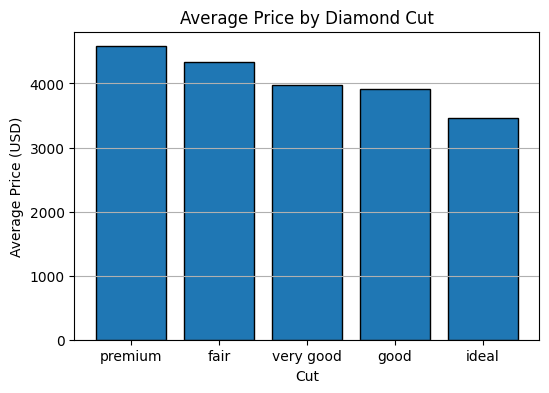

In [ ]:
#из Средняя цена по типу огранки
avg_price_by_cut = df.groupby('cut', observed=True)['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(avg_price_by_cut.index, avg_price_by_cut.values, edgecolor='black')
plt.title('Average Price by Diamond Cut')
plt.xlabel('Cut')
plt.ylabel('Average Price (USD)')
plt.grid(axis='y')

plt.show()


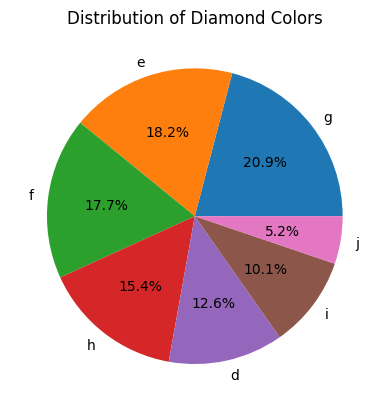

In [ ]:
# Из датасета
counts = df['color'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Diamond Colors')
plt.show()

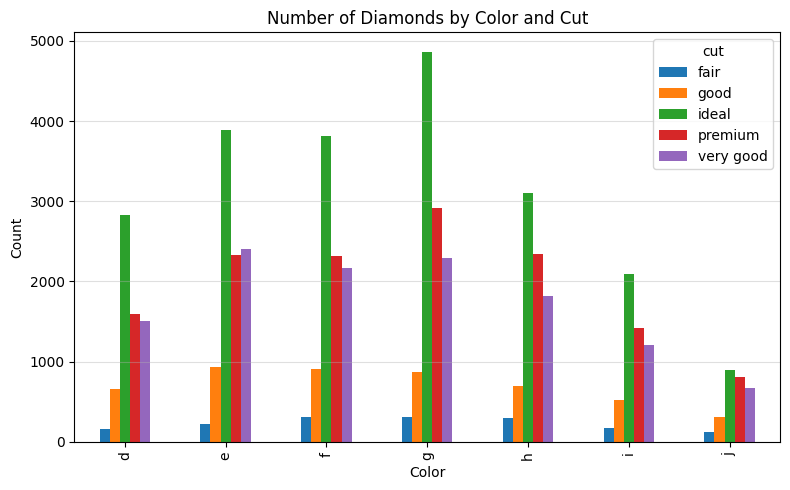

In [ ]:
#из Количество алмазов по цвету и типу огранки
counts = df.pivot_table(index='color', columns='cut', values='price', aggfunc='count', observed=True)

ax = counts.plot(kind='bar', figsize=(8, 5))
ax.set_title('Number of Diamonds by Color and Cut')
ax.set_xlabel('Color')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=.4)
plt.tight_layout()
plt.show()


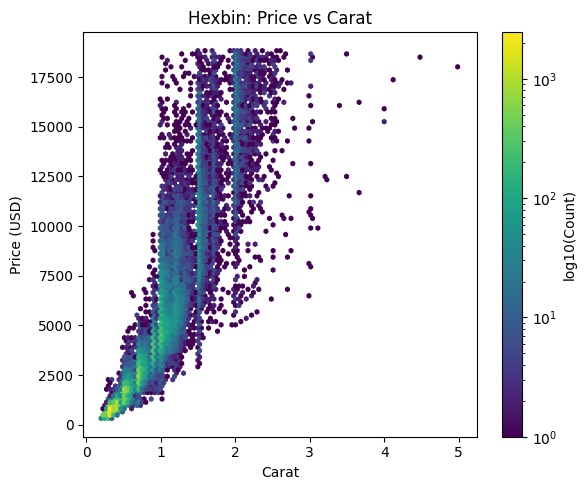

In [ ]:
plt.figure(figsize=(6, 5))
hb = plt.hexbin(
    df['carat'],
    df['price'],
    bins='log'
)
plt.colorbar(hb, label='log10(Count)')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.title('Hexbin: Price vs Carat')
plt.tight_layout()
plt.show()


Seaborn

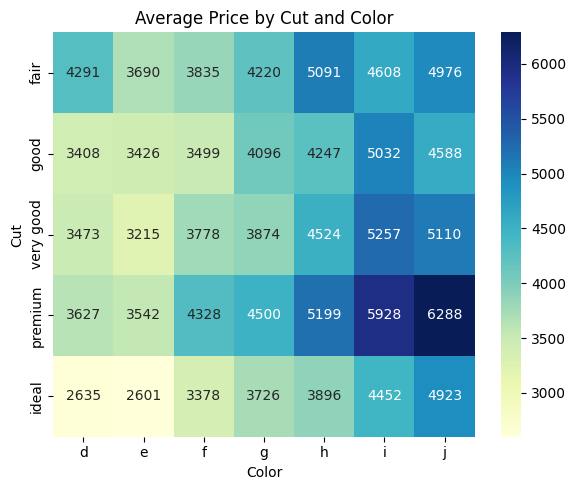

In [ ]:
pivot = df.pivot_table(index='cut', columns='color', values='price', aggfunc='mean', observed=True)

pivot = pivot.reindex(index=['fair','good','very good','premium','ideal'])

plt.figure(figsize=(6,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Price by Cut and Color')
plt.xlabel('Color')
plt.ylabel('Cut')
plt.tight_layout()
plt.show()


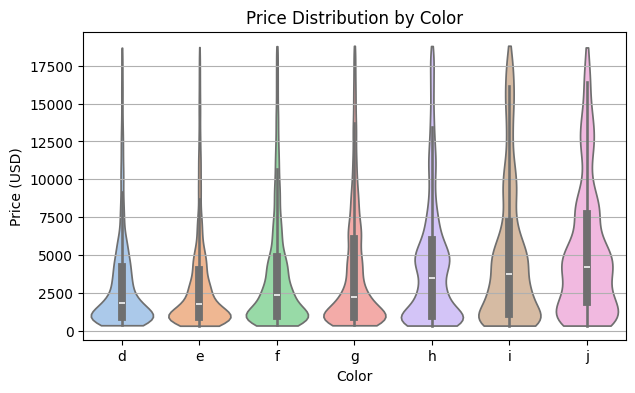

In [ ]:
plt.figure(figsize=(7, 4))
sns.violinplot(x='color', y='price', data=df, hue='color', palette='pastel', cut=0)
plt.title('Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price (USD)')
plt.grid(axis='y')
plt.show()

### **Типичный потребитель результатов анализа данных:**
**Аналитик отдела ценообразования ювелирного ритейлера**

**Задачи аналитика:**

* Определить, от каких характеристик алмазов зависит цена и насколько сильно.
* Построить эффективную модель оценки стоимости алмазов.
* Дать рекомендации по закупкам и ценообразованию.

---

### **Что важно этому потребителю?**

| Показатель                | Значение                                                                                                             | Почему важно                                                                                                          |
| ------------------------- | -------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Вес алмаза (carat)**    | Корреляция с ценой ≈ **0.922**                                                                                       | Основной фактор, определяющий цену. Аналитику важно учитывать именно этот показатель в первую очередь.                |
| **Объём алмаза (volume)** | Корреляция с ценой ≈ **0.904**                                                                                       | Вторая по значимости характеристика после веса. Особенно важна, если данные по массе недоступны.                      |
| **Огранка (cut)**         | Наибольшая средняя цена — **Premium** (≈ 4578 USD), наиболее распространённая — **Ideal** (≈ 3462 USD) | Аналитику нужно понимать, какие огранки приносят больше выручки и чаще продаются.                                     |
| **Цвет (color)**          | Наибольшая доля алмазов — цвет **G (20.92 %)**, **E (18.17 %)**, **F (17.69 %)**                         | Позволяет аналитику точнее планировать закупки и ассортимент.                                                         |
| **Чистота (clarity)**     | Самые массовые категории: **SI1 (24.23 %)**, **VS2 (22.73 %)**, **SI2 (17 %)**                        | Аналитик должен понимать типичные категории чистоты, чтобы корректно сегментировать цены.                             |
| **Диапазон цен**          | Наибольшее число сделок в диапазоне **≈ 1000–3000 USD (медиана ≈ 1787 USD)**                                         | Помогает аналитику понять, на каком ценовом сегменте стоит сфокусировать основное внимание в модели оценки стоимости. |

---

### **Итого (вербально):**

Потребитель — аналитик отдела ценообразования в ювелирном ритейле. Он ориентируется прежде всего на **массу камней (carat)** и в дополнение на **объём**, так как эти характеристики имеют наибольшую значимость для точной оценки стоимости. Он знает, что наиболее продаваемый камень — это примерно **0.7 карат**, категории **Ideal или Premium**, цвета **G–F–E** и чистоты **SI1–VS2**, со средней сделкой около **1787 USD**. Именно по этим цифрам он оценивает полезность анализа и на основе этого принимает решения по закупкам, маркетингу и ценообразованию.


#Выводы и рекомендации

### 1. Итоги проделанной работы

* Произведена комплексная обработка датасета с ценами алмазов: очистка, проверка пропусков, типизация, добавление объёма.
* Выполнен исследовательский анализ: корелляционный, сводные таблицы, визуализации (Matplotlib / Seaborn).
* Установлены ключевые ценовые категри `cut`, `color`, `clarity`.

### 2. Ответ на бизнес-задачу

**Цель:** понять, какие характеристики сильнее всего влияют на цену алмаза, и сформировать базовую модель оценки.
**Результат:**

* Вес (`carat`) и объём объясняют > 90 % дисперсии цены.
* Категориальные признаки (cut / color / clarity) дают доп-коррекцию ± 10-15 %.
  Следовательно, исходная задача **решена**: выявлены главные ценовые факторы

### 3. Практические рекомендации

1. **Фокус на массе и объёме при закупках.**
   *Почти вся ценовая вариация определяется этими переменными; мелкие различия в цвете/чистоте критичны лишь в премиум-сегменте.*
2. **Ассортимент:** держать **Ideal / Premium, цвета G–F–E, чистота SI1–VS2** — они покрывают \~45 % продаж и дают наилучший оборот.
3. **Ценообразование:** базовая ценовая зона 1 000–3 000 USD (≈ 30 % сделок). Сосредоточить маркетинг и акции именно на этом диапазоне, а для камней > 5 000 USD внедрить персонализированные предложения.

### 4. Дальнейшие шаги

* **Создание простого аналитического приложения** Которое позволит анализировать данные используя графический интерфейс.


In [ ]:
from google.colab import files
df.to_csv('data.csv', index=False)
files.download('data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>